# INDRODUÇÃO

Este modelo de aprendizado de máquina tem como objetivo prever as classes de pessoas com base na idade e salário de pessoas separadas por agrupamento hierárquico, e usando a Regressão Logística para prever a classe de uma pessoa com base em sua idade, lembrando que, esses dados são fictícios apenas para teste, não tendo nenhuma relação com o mundo real. Portando não podem ser considerados como casos reais, são apenas para demonstrar os grupos.   

## Autor: Rosinaldo Alves da Silva

Usar esse modelo em outros projetos sem comunicar o autor pode ocasionar em violação de autoria, no entanto, deve ser observado por recrutadores e pessoas interessadas em aprendizagem. 

## Preparação dos dados e importação dos módulos necessários

In [264]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics

In [265]:
idade =   [16, 17, 18, 19, 20, 25, 26, 27, 30, 31, 40, 45, 50, 55, 60, 65, 70]
salario = [600, 800, 1300, 1400, 1450, 1800, 1900, 1950, 2000, 2100, 2500, 2600, 2800, 3000, 3200, 3400, 3600]

In [266]:
x = idade
y = salario

### visualização dos dados com um gráfico de dispersão

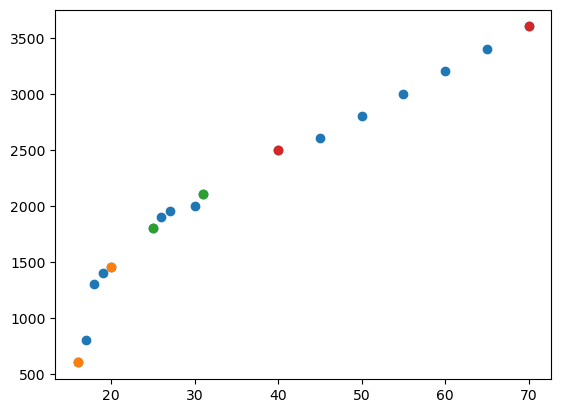

In [271]:
plt.scatter(x, y)
plt.scatter([16, 20], [600, 1450])
plt.scatter([25, 31], [1800, 2100])
plt.scatter([40, 70], [2500, 3600])
plt.show()

Com base nesses pontos de dados é possível verificar que podemos classificar em três grupos: grupo 1, grupo 2, grupo 3. Sendo assim, o grupo 1 está com faixa de salário de 600.00 à 1450.00; grupo 2 de 1800.00 à 2100.00 e o grupo 3 de 2500.00 à 3600.00 reais.

## Criando as classes com o agrupamento hierárquico 

In [272]:
pontos = list(zip(x, y))

In [273]:
pontos

[(16, 600),
 (17, 800),
 (18, 1300),
 (19, 1400),
 (20, 1450),
 (25, 1800),
 (26, 1900),
 (27, 1950),
 (30, 2000),
 (31, 2100),
 (40, 2500),
 (45, 2600),
 (50, 2800),
 (55, 3000),
 (60, 3200),
 (65, 3400),
 (70, 3600)]

In [274]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [275]:
linkage_p = linkage(pontos, method = 'ward', metric = 'euclidean')

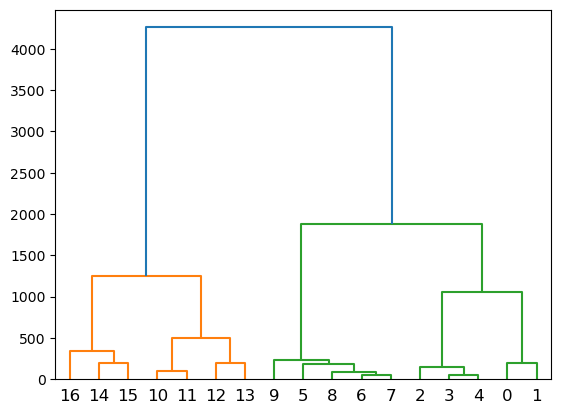

In [277]:
dendrogram(linkage_p)
plt.show()

In [244]:
from sklearn.cluster import AgglomerativeClustering

In [278]:
classificando = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')

In [279]:
classes = classificando.fit_predict(pontos)

C:\Users\Rosinaldo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [285]:
classes

array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

### Podemos observar que o grupo 1 ficou na classe 1, grupo 2 na classe 2 e grupo 3 na classe 0

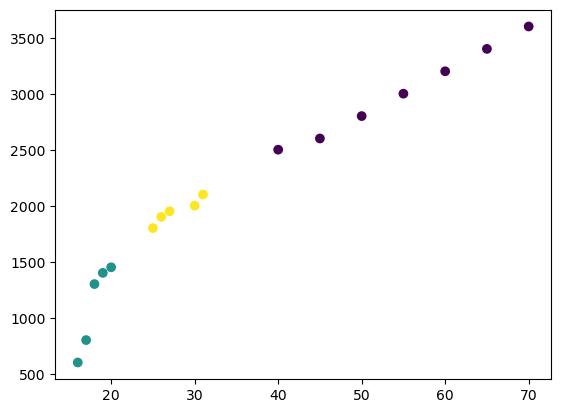

In [283]:
plt.scatter(x, y, c = classes)
plt.show()

# Criando o modelo de classificação com a Regressão Logistica  

Definição da variável independente, que são as idades e a variável dependente que são os salários, lembrando que, o objetivo não é prever quanto uma determinada pessoa ganha, mas sim, sua classe de associação.

In [286]:
X = np.array(idade).reshape(-1, 1)
y1 = classes

In [288]:
model = linear_model.LogisticRegression()
logr = model.fit(X, y1)

In [289]:
print(logr.score(X, y1))

1.0


Temos uma acurácia de 100%, podemos conferir na matriz de confusão

In [290]:
cf_mat = metrics.confusion_matrix(y1, logr.predict(X))

In [291]:
cf_mat

array([[7, 0, 0],
       [0, 5, 0],
       [0, 0, 5]], dtype=int64)

In [292]:
cm_display = metrics.ConfusionMatrixDisplay(cf_mat, display_labels = [0, 1, 2])

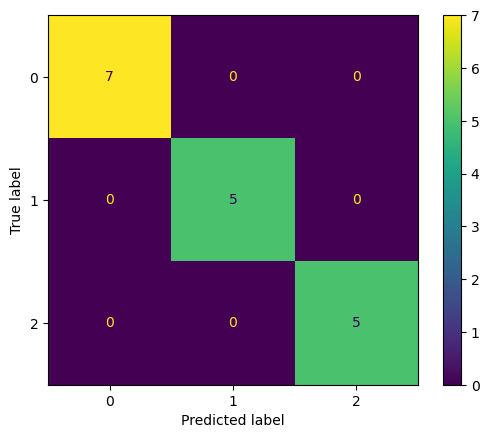

In [293]:
cm_display.plot()
plt.show()

In [294]:
log_odds = logr.coef_
odds = np.exp(log_odds)

In [295]:
odds

array([[2.08797728],
       [0.43044353],
       [1.11264866]])

## Agora podemos prever em qual classe cada pessoa se enquadrada com base na idade

In [296]:
preds = logr.predict([[15], [21], [23], [25], [33], [41], [50], [60], [65], [75]])

In [297]:
preds

array([1, 1, 2, 2, 2, 0, 0, 0, 0, 0], dtype=int64)

### Classe 1, são as pessoas de 600 à 1450 (idades entre 16 e 20); 
### classe 2 de 1800 à 2100 (idades entre 25 e 31); 
### classe 0(zero) de 2500 à 3600 (idades entre 40 e 70).

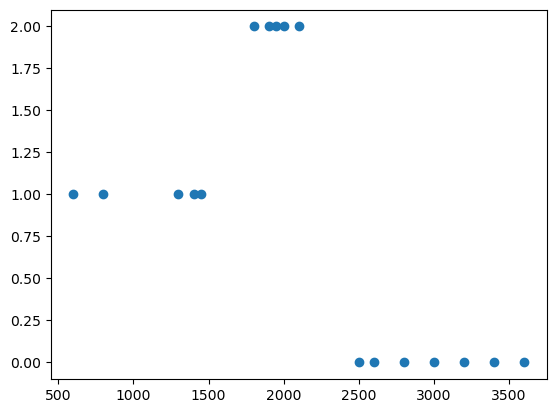

In [300]:
plt.scatter(y, classes)
plt.show()

Podemos concluir que é possível classificar as pessoas em grupos de acordo com seu salário ou renda, 
lembrando que, os dados demonstrados aqui são fictícios, não tendo nenhuma relação com o mundo real, sendo apenas para teste.